In [2]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
import numpy as np 

(train_images, train_labels), (test_images, test_images) = mnist.load_data()
train_num = train_images.shape[0]
rows = train_images.shape[1]
cols = train_images.shape[2]
test_num = test_images.shape[0]


In [1]:
import tensorflow as tf 
print(tf.__version__)

2.3.1


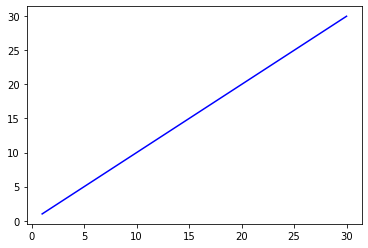

In [7]:
import matplotlib.pyplot as plt
x = range(1,31)
y = range(1,31)
plt.plot(x, y, 'b')
plt.show()

In [1]:
import tensorflow as tf 
import timeit
with tf.device('/cpu:0'):
    cpu_a = tf.random.normal([10000,1000])
    cpu_b = tf.random.normal([1000,2000])
    print(cpu_a.device, cpu_b.device)
with tf.device('/gpu:0'):
    gpu_a = tf.random.normal([10000,1000])
    gpu_b = tf.random.normal([1000,2000])
    print(gpu_a.device, gpu_b.device)
def cpu_run():
    with tf.device('/cpu:0'):
        c = tf.matmul(cpu_a, cpu_b)
    return c
def gpu_run():
    with tf.device('/gpu:0'):
        c = tf.matmul(gpu_a, gpu_b)
    return c

#cpu启动设置还需要一些时间，所以warmup的时间并不能计算在内
cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('warmup:',cpu_time, gpu_time)
#下面的run time 才是真正的计算时间
cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('run time:',cpu_time, gpu_time)

/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.8032680180003808 0.34745244100122363
run time: 0.7749851799999306 0.00042019600005005486


In [10]:
tf.constant(1, dtype='int32')

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [12]:
tf.constant('hello,tensoflow', dtype='string')

<tf.Tensor: shape=(), dtype=string, numpy=b'hello,tensoflow'>

In [20]:
gpu_a = tf.random.normal([10000,1000])
gpu_b = tf.random.normal([1000,2000])
c = tf.matmul(gpu_a, gpu_b)
print(c.device)
print(c)

/job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[-25.31        20.393114   -13.346751   ... -46.711075    -3.2422483
    4.5185966 ]
 [-23.117785   -50.4322     -35.6097     ...  23.97456    -28.677197
  -56.85      ]
 [ 42.449463    16.767519    11.979484   ...  19.830564   -58.46501
  -20.113504  ]
 ...
 [ 28.727642    -0.50437367 -27.838022   ...  27.029915   -18.462667
  -21.382555  ]
 [-18.410994     5.699733   -19.44172    ... -69.61411     10.630289
   24.06177   ]
 [ 25.573412    37.931263     2.749877   ...   4.7801642   11.613364
    5.862221  ]], shape=(10000, 2000), dtype=float32)


In [21]:
print(gpu_a.name)

AttributeError: Tensor.name is meaningless when eager execution is enabled.

In [29]:
a = [1,2,3]
aa = tf.convert_to_tensor(a)
print(tf.is_tensor(aa))
print(tf.is_tensor(a))
aaa = np.array(aa)
print(tf.is_tensor(aaa))

True
False
False


In [8]:
import tensorflow as tf
a = tf.random.normal([5,128,128,3])
print(a[1].shape)
print(a[1][2].shape)
print(a[1][2][3].shape)
print(a[1,2,3].shape)
print(a[1,2,3,1].shape)

(128, 128, 3)
(128, 3)
(3,)
(3,)
()


In [11]:
a = tf.range(10)
print(a)
print(a[-1:])
print(a[-2:])

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [12]:
a = tf.random.normal([3,4,5,6,7])

In [20]:
print(a[1,...,6].shape)
print(a[...,4].shape)
print(a[:,::2,...].shape)
print(a[1,2,3,4,5])

(4, 5, 6)
(3, 4, 5, 6)
(3, 2, 5, 6, 7)
tf.Tensor(-1.5087879, shape=(), dtype=float32)


In [2]:
import tensorflow as tf 
a = tf.random.normal([4,35,8])

In [3]:
tf.gather(a, axis = 0, indices = [2,3]).shape #gather 用来实现任意的切片

TensorShape([2, 35, 8])

In [4]:
tf.gather(a, axis = 1, indices = [1,3,4,5]).shape

TensorShape([4, 4, 8])

In [5]:
tf.gather(a, axis = 2, indices = [4,2,5,1]).shape

TensorShape([4, 35, 4])

In [7]:
tf.gather_nd(a, [0,1,1]).shape

TensorShape([])

In [8]:
tf.gather_nd(a, [[0,1,1]]).shape

TensorShape([1])

In [9]:
tf.gather_nd(a, [[0,1]]).shape

TensorShape([1, 8])

In [10]:
tf.gather_nd(a, [0,1]).shape

TensorShape([8])

In [13]:
tf.gather_nd(a, [[[0,1,1],[1,2,2],[3,4,4]]]).shape

TensorShape([1, 3])

In [14]:
tf.boolean_mask(a, mask=[False, True, True, False]).shape

TensorShape([2, 35, 8])

In [23]:
tf.boolean_mask(a, mask=[False, True, True, False, False, True, True, False],axis = 2).shape #这种写法需要

TensorShape([4, 35, 4])

In [24]:
print(a.shape, a.ndim)

(4, 35, 8) 3


In [26]:
#reshape,只要保持矩阵中元素个数不变即可
tf.reshape(a, [4,280]).shape

TensorShape([4, 280])

In [27]:
tf.reshape(a, [4,280,1]).shape

TensorShape([4, 280, 1])

In [28]:
tf.reshape(a,[1120]).shape

TensorShape([1120])

In [29]:
print(a.shape)

(4, 35, 8)


In [36]:
tf.reshape(a,[-1]).shape

TensorShape([1120])

In [39]:
a = [[1,2],[3,4]]
a = tf.convert_to_tensor(a)

In [41]:
b1 = tf.reshape(a, [4,1])
print(b1)

tf.Tensor(
[[1]
 [2]
 [3]
 [4]], shape=(4, 1), dtype=int32)


In [49]:
c = tf.transpose(a)
b2 = tf.reshape(c, [4,1])
print(b2)

tf.Tensor(
[[1]
 [3]
 [2]
 [4]], shape=(4, 1), dtype=int32)


In [50]:
a = tf.random.normal([4,28,27,3])

In [51]:
tf.transpose(a, perm = [0,2,1,3]).shape

TensorShape([4, 27, 28, 3])

In [52]:
#增加维度
tf.expand_dims(a, axis = 0).shape

TensorShape([1, 4, 28, 27, 3])

In [53]:
tf.expand_dims(a, axis = 1).shape

TensorShape([4, 1, 28, 27, 3])

In [54]:
tf.expand_dims(a, axis = -1).shape

TensorShape([4, 28, 27, 3, 1])

In [58]:
b = tf.random.normal([1,2,1,3])

In [59]:
#squeeze 可以削减值为一的维度
tf.squeeze(b).shape

TensorShape([2, 3])

In [60]:
tf.squeeze(b, axis = 0).shape

TensorShape([2, 1, 3])

In [62]:
tf.squeeze(b, axis = -1).shape

InvalidArgumentError: Can not squeeze dim[3], expected a dimension of 1, got 3 [Op:Squeeze]

In [63]:
tf.squeeze(b, axis = -2).shape

TensorShape([1, 2, 3])